Importing the Libraries for Data-Description

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read the data from 'dataset.csv' file and create a dataframe

In [2]:
df = pd.read_csv('dataset.csv')
df.shape

(3216, 13)

In [3]:
df.head()

,Length of URL,Has IP address,Shortening Service,Having @ Symbol,Double Slash Redirecting,Prefix-Suffix,Standard Port,CTLD,HTTPS in Domain,Sensitive Words,Has Tilde,Has Port,Result
0,1,1,-1,1,1,-1,0,1,-1,1,1,-1,1
1,1,1,1,1,1,1,0,1,-1,-1,1,-1,1
2,1,1,1,1,1,1,0,1,-1,-1,1,-1,1
3,1,1,1,1,1,1,0,-1,-1,1,1,-1,1
4,1,1,1,1,1,1,0,0,-1,1,1,-1,1


In [4]:
df.columns  

Index(['Length of URL', ' Has IP address', ' Shortening Service',
       ' Having @ Symbol', ' Double Slash Redirecting', ' Prefix-Suffix',
       ' Standard Port', ' CTLD', ' HTTPS in Domain', ' Sensitive Words',
       ' Has Tilde', ' Has Port', ' Result'],
      dtype='object')

As the column names have leading white spaces, we will rename the columns

In [5]:
df.rename(columns={' Has IP address':'Has_IP_address', ' Shortening Service':'Shortening_Service', ' Having @ Symbol':'Having_@_Symbol', ' Double Slash Redirecting':'Double_Slash_Redirecting', ' Prefix-Suffix':'Prefix-Suffix', ' Standard Port':'Standard_Port', ' CTLD':'CTLD', ' HTTPS in Domain':'HTTPS_in_Domain', ' Sensitive Words':'Sensitive_Words', ' Has Tilde':'Has_Tilde', ' Has Port':'Has_Port', ' Result':'Result'}, inplace=True)

As we had merged two csv files to create a dataset, we need to check the unique values present in each column

In [6]:
# Investigate unique values in the each column
unique_IP = df['Has_IP_address'].unique()
unique_SS = df['Shortening_Service'].unique()
unique_HAS = df['Having_@_Symbol'].unique()
unique_DSR = df['Double_Slash_Redirecting'].unique()
unique_PS = df['Prefix-Suffix'].unique()
unique_SP = df['Standard_Port'].unique()
unique_CTLD = df['CTLD'].unique()
unique_HID = df['HTTPS_in_Domain'].unique()
unique_SW = df['Sensitive_Words'].unique()
unique_HT = df['Has_Tilde'].unique()
unique_HP = df['Has_Port'].unique()
unique_R = df['Result'].unique()

In [7]:
print(unique_IP)
print(unique_SS)
print(unique_HAS)
print(unique_DSR)
print(unique_PS)
print(unique_SP)
print(unique_CTLD)
print(unique_HID)
print(unique_SW)
print(unique_HT)
print(unique_HP)
print(unique_R)

[' 1             ' ' -1            ' ' Has IP address']
[' -1                ' ' 1                 ' ' Shortening Service']
[' 1              ' ' -1             ' ' Having @ Symbol']
[' 1                       ' ' -1                      '
 ' Double Slash Redirecting']
[' -1           ' ' 1            ' ' Prefix-Suffix']
[' 0            ' ' -1           ' ' Standard Port']
[' 1   ' ' -1  ' ' 0   ' ' CTLD']
[' -1             ' ' HTTPS in Domain']
[' 1              ' ' -1             ' ' Sensitive Words']
[' 1        ' ' -1       ' ' Has Tilde']
[' -1      ' ' 1       ' ' Has Port']
[' 1' ' Result' ' -1']


As there are white-space along with 1, 0, and -1 we need to remove rest of the things, and then convert the values to int 

In [8]:
validValues = {-1, 0, 1}

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[df[column].isin(validValues)]

# Convert all columns to integers (again after the filtering)
df = df.astype(int)

In [9]:
# Now you can use the DataFrame with valid integer values (1, -1, and 0)
print(df)

      Length of URL  Has_IP_address  Shortening_Service  Having_@_Symbol  \
0                 1               1                  -1                1   
1                 1               1                   1                1   
2                 1               1                   1                1   
3                 1               1                   1                1   
4                 1               1                   1                1   
...             ...             ...                 ...              ...   
3211             -1               1                   1                1   
3212              1               1                   1                1   
3213             -1               1                   1                1   
3214             -1               1                   1                1   
3215              1               1                   1                1   

      Double_Slash_Redirecting  Prefix-Suffix  Standard_Port  CTLD  \
0                

Again check for the unique values present in each column

In [10]:
# Investigate unique values in the each column
unique_IP_2 = df['Has_IP_address'].unique()
unique_SS_2 = df['Shortening_Service'].unique()
unique_HAS_2 = df['Having_@_Symbol'].unique()
unique_DSR_2 = df['Double_Slash_Redirecting'].unique()
unique_PS_2 = df['Prefix-Suffix'].unique()
unique_SP_2 = df['Standard_Port'].unique()
unique_CTLD_2 = df['CTLD'].unique()
unique_HID_2 = df['HTTPS_in_Domain'].unique()
unique_SW_2 = df['Sensitive_Words'].unique()
unique_HT_2 = df['Has_Tilde'].unique()
unique_HP_2 = df['Has_Port'].unique()
unique_R_2 = df['Result'].unique()

In [11]:
print(unique_IP_2)
print(unique_SS_2)
print(unique_HAS_2)
print(unique_DSR_2)
print(unique_PS_2)
print(unique_SP_2)
print(unique_CTLD_2)
print(unique_HID_2)
print(unique_SW_2)
print(unique_HT_2)
print(unique_HP_2)
print(unique_R_2)

[ 1 -1]
[-1  1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 0 -1]
[ 1 -1  0]
[-1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1]


In [12]:
df.shape

(3215, 13)

In [13]:
print("number of 1",len(df[df["Result"]==1]))
print("number of -1",len(df[df["Result"]==-1]))

number of 1 1675
number of -1 1540


We now find the correlation between the columns values

In [14]:
corr=df.corr()
corr

,Length of URL,Has_IP_address,Shortening_Service,Having_@_Symbol,Double_Slash_Redirecting,Prefix-Suffix,Standard_Port,CTLD,HTTPS_in_Domain,Sensitive_Words,Has_Tilde,Has_Port,Result
Length of URL,1.000000,-0.041203,-0.034529,0.117355,0.290714,0.047705,0.087400,0.240436,NaN,0.151409,0.072141,-0.087400,0.062663
Has_IP_address,-0.041203,1.000000,-0.021717,-0.008784,-0.017440,-0.025483,-0.008881,0.145880,NaN,-0.022739,-0.003642,0.008881,0.007357
Shortening_Service,-0.034529,-0.021717,1.000000,-0.026314,0.004121,-0.034758,-0.017336,-0.033532,NaN,0.031097,-0.014877,0.017336,-0.039824
Having_@_Symbol,0.117355,-0.008784,-0.026314,1.000000,0.272156,-0.016883,-0.014675,0.044981,NaN,-0.019146,-0.006017,0.014675,-0.010665
Double_Slash_Redirecting,0.290714,-0.017440,0.004121,0.272156,1.000000,-0.074779,0.177036,0.016444,NaN,0.268797,-0.011947,-0.177036,0.037572
Prefix-Suffix,0.047705,-0.025483,-0.034758,-0.016883,-0.074779,1.000000,-0.042572,0.122397,NaN,-0.000093,0.022632,0.042572,0.120638
Standard_Port,0.087400,-0.008881,-0.017336,-0.014675,0.177036,-0.042572,1.000000,0.009425,NaN,0.180836,-0.006083,-1.000000,0.054402
CTLD,0.240436,0.145880,-0.033532,0.044981,0.016444,0.122397,0.009425,1.000000,NaN,0.056727,0.029383,-0.009425,0.137541
HTTPS_in_Domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sensitive_Words,0.151409,-0.022739,0.031097,-0.019146,0.268797,-0.000093,0.180836,0.056727,NaN,1.000000,-0.015577,-0.180836,0.040490


<Axes: >

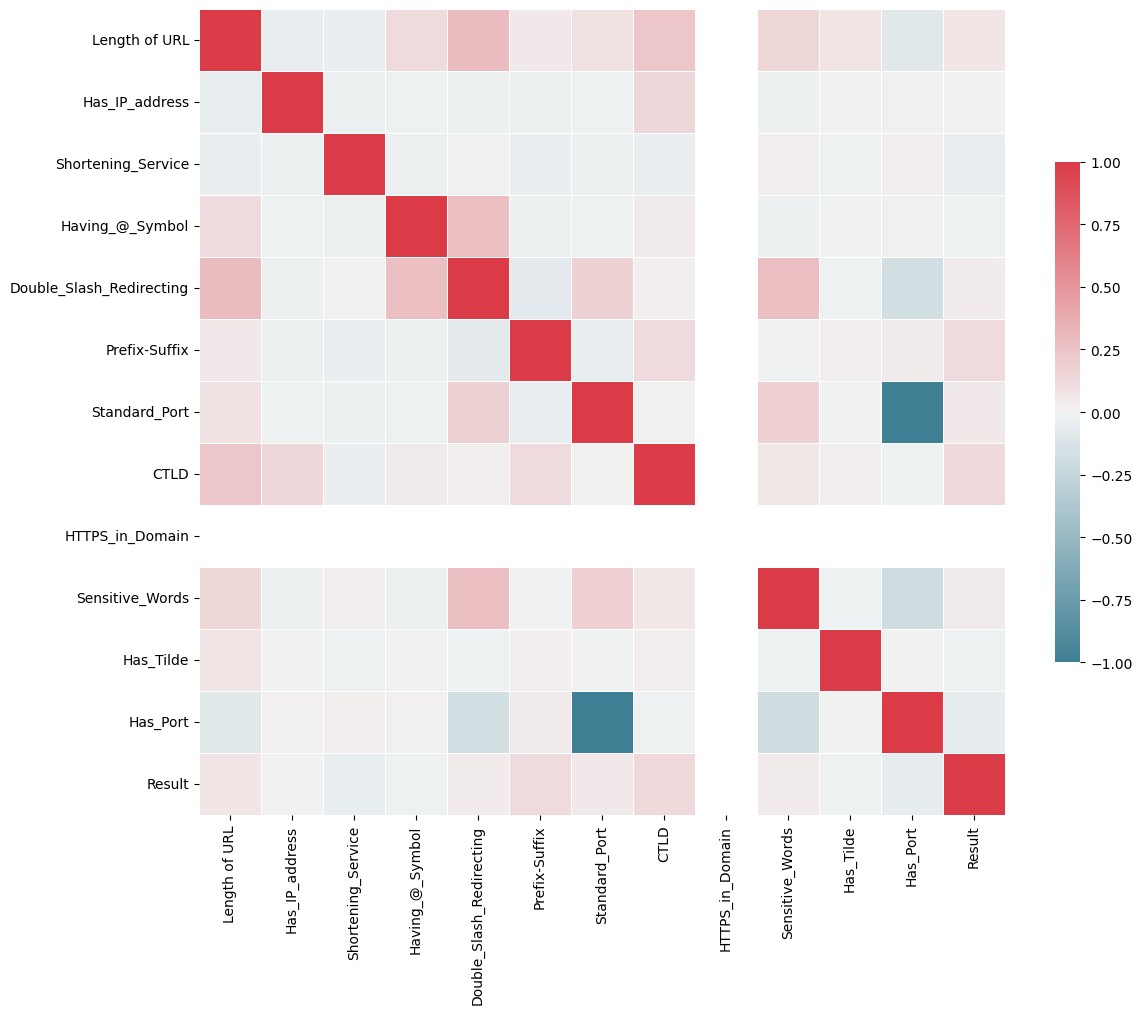

In [15]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})